### Imp ref
[Identifying the numbers of AR or MA terms in an ARIMA model](https://people.duke.edu/~rnau/411arim3.htm)

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [6]:
hsales = pd.read_csv('../Data/hsales.csv', index_col = 'date', parse_dates = True)
hsales.head()

hsales
date              
1973-01-01      55
1973-02-01      60
1973-03-01      68
1973-04-01      63
1973-05-01      65

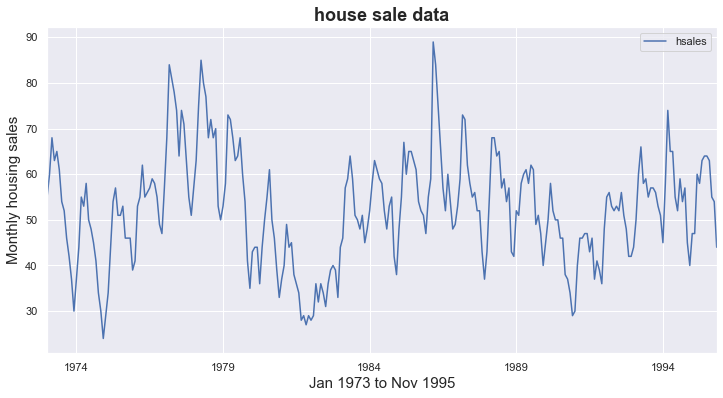

In [9]:
hsales.plot(figsize = (12,6));
plt.ylabel('Monthly housing sales', fontsize=15);
plt.xlabel('Jan 1973 to Nov 1995', fontsize=15);
plt.title('house sale data', weight='bold', fontsize=18);

### Autocorrelation function

The autocorrelation function (ACF plot) helps us to estimate the parameter q of the ARIMA model (p,d,q). In the ACF plot, the spikes at different lag are considered to be insignificant if it lies between te dashed lines.

The ACF plot of hsales data is shown below. From the plot, we can make the following observations:
- The difference between the ACF value between lags is not significant.
- The ACF values decay towards 0

This signifies that the hsales data might not have MA(q) and that the series is stationary.

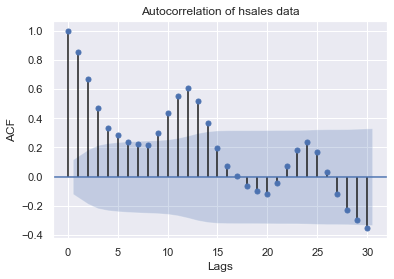

In [13]:
plot_acf(hsales, lags = 30);
plt.xlabel('Lags');
plt.ylabel('ACF');
plt.title('Autocorrelation of hsales data');

Thousands of Passengers
Month                              
1949-01-01                      112
1949-02-01                      118
1949-03-01                      132
1949-04-01                      129
1949-05-01                      121

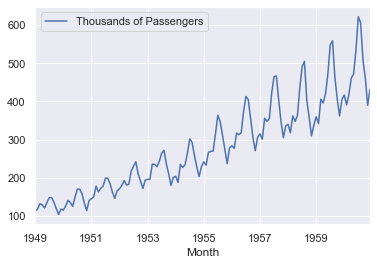

In [14]:
airline = pd.read_csv('../Data/airline_passengers.csv',index_col='Month',parse_dates=True)
airline.dropna(inplace=True)
airline.plot();
airline.head()

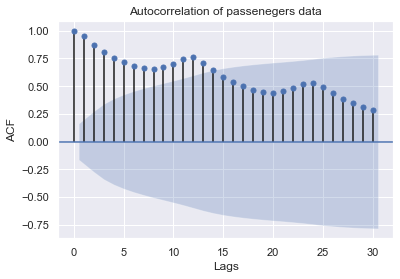

In [16]:
plot_acf(airline, lags = 30);
plt.xlabel('Lags');
plt.ylabel('ACF');
plt.title('Autocorrelation of passenegers data');

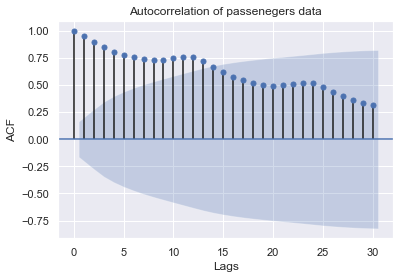

In [17]:
plot_acf(np.log(airline), lags = 30);
plt.xlabel('Lags');
plt.ylabel('ACF');
plt.title('Autocorrelation of passenegers data');

when we observe the ACF plot of log(AirPassengers), we see that:

- The difference between the ACF value between lags is not significant
- The ACF values are not decaying towards 0, indicating that the series is not stationary

As the series is non-stationary, we need to make the series stationary by differencing it.

Now, let us consider the Δ2log(AirPassengers) data which is stationary. We can observe from the figure that:
- There is a significant difference between the ACF values between adjacent lags
- The ACF values abruptly go towards 0 after lag 2


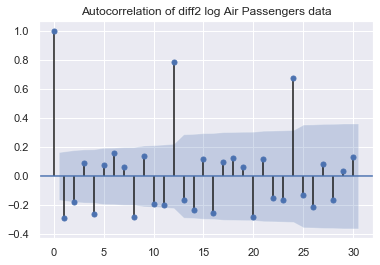

In [33]:
plot_acf(np.diff(np.log(airline).T.values[0], 2), lags=30);
plt.title('Autocorrelation of diff2 log Air Passengers data');

The abrupt movement of the spike towards 0 signifies that Δ2log(AirPassengers) data might have MA(q) component. The lag after which the value of ACF is between the shaded area is chosen as the value of q. Here we can observe that q = 2.

If a model is only MA(q) model then the spikes in the ACF plot goes abruptly towards zero (i.e the difference between the first and the second lag is significant) and in PACF spikes decay towards zero after.

![](blog1.PNG)

***

## PACF

Patial autocorrelations are used to measure the degree of association between $Y_t$ and $Y_{t-k}$ when the effects at other time lags 1,2,3,.., (k-1) are removed.

From the PACF plot of hsales data, we can make the following observations:
- There is a significant difference between the PACF values between adjacent lags
- The PACF values abruptly go towards 0 after lag 6


The abrupt movement of the spike towards 0 signifies hsales data might have AR(p) component. The lag after which the value of ACF is between the shaded area is chosen as the value of p. Here we can observe that p=6.

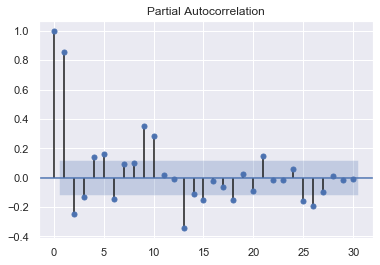

In [35]:
plot_pacf(hsales, lags=30);

From the PACF plot of Δ2log(AirPassengers) data, we can make the following observations:
- There is a significant difference between the PACF values between adjacent lags
- The PACF values abruptly go towards 0 after lag 2


The abrupt movement of the spike towards 0 signifies $Δ2log(AirPassengers)$ data might have AR(p) component. The lag after which the value of PACF is between the shaded area is chosen as the value of p. Here we can observe that p=2.

C:\Users\Jeswin\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1406: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


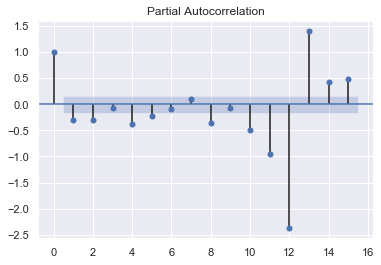

In [38]:
plot_pacf(np.diff(np.log(airline).T.values[0], 2), lags=15);

 If a model is only AR(p) model then the spikes in the PACF plot goes abruptly towards zero and in ACF spikes decay towards zero.
 
 ![](blog2.PNG)